## Data Comprehension - Test de Créativité
## **Objectif** : Comprendre la structure des 362 questions et leur système de scoring personnalisé
# 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Data collection

In [2]:
import pandas as pd
import os

# 📁 Dossier contenant tes fichiers .txt
folder_path = "C:/Users/user/Desktop/Stage_Data"

# 📄 Liste des fichiers .txt à fusionner
txt_files = [
    "data1.txt",
    "data2.txt",
    "data3.txt",
    "data4.txt"
]

# 📥 Lire tous les fichiers avec test automatique du séparateur
dataframes = []

for filename in txt_files:
    file_path = os.path.join(folder_path, filename)
    for sep in ['\t', ',', ';']:
        try:
            df = pd.read_csv(file_path, sep=sep, engine='python')
            dataframes.append(df)
            print(f"✅ {filename} lu avec séparateur '{sep}'")
            break
        except Exception as e:
            continue
    else:
        print(f"❌ Échec de lecture pour {filename}")

# 🧩 Fusionner tous les fichiers lus
if dataframes:
    combined_df = pd.concat(dataframes, ignore_index=True)

    # 💾 Exporter vers Excel
    output_file = os.path.join(folder_path, "combined_txt_data.xlsx")
    combined_df.to_excel(output_file, index=False)

    print(f"\n✅ Fichier Excel généré : {output_file}")
else:
    print("\n❌ Aucun fichier n'a pu être lu correctement.")


✅ data1.txt lu avec séparateur '	'
✅ data2.txt lu avec séparateur '	'
✅ data3.txt lu avec séparateur '	'
✅ data4.txt lu avec séparateur '	'

✅ Fichier Excel généré : C:/Users/user/Desktop/Stage_Data\combined_txt_data.xlsx


In [3]:
import pandas as pd
import os

# Chemin vers le dossier contenant les fichiers
chemin = r'C:\Users\user\Desktop\Stage_Data'

# Noms des fichiers
fichiers = ['data1.xlsx', 'data2.xlsx', 'data3.xlsx', 'data4.xlsx']

# Lecture des fichiers
dataframes = [pd.read_excel(os.path.join(chemin, f)) for f in fichiers]

# Vérification des colonnes (par nom uniquement)
colonnes = [set(df.columns) for df in dataframes]

if all(colonnes[0] == c for c in colonnes[1:]):
    print("✅ Tous les fichiers ont les mêmes colonnes.")
    df_combine = pd.concat(dataframes, ignore_index=True)
    # Sauvegarde du fichier combiné
    output_path = os.path.join(chemin, 'data_combine.xlsx')
    df_combine.to_excel(output_path, index=False)
    print(f"✅ Fichier combiné sauvegardé : {output_path}")
else:
    print("❌ Les colonnes ne sont pas identiques.")
    for i, cols in enumerate(colonnes, 1):
        print(f"Colonnes dans data{i}.xlsx : {sorted(cols)}")


❌ Les colonnes ne sont pas identiques.
Colonnes dans data1.xlsx : ['ID', 'Level', 'Main_Category', 'Question_EN', 'Score_1', 'Score_2', 'Score_3', 'Score_4', 'Score_5', 'Subcategory']
Colonnes dans data2.xlsx : ['ID,Question_EN,Main_Category,Subcategory,Level,Score_1,Score_2,Score_3,Score_4,Score_5']
Colonnes dans data3.xlsx : ['197,"Assigns responsibilities to individuals for creating innovative ideas/products",Innovation,Responsibility Assignment,Expert,0,1,3,5,7']
Colonnes dans data4.xlsx : ['393,"Considers both risks and costs alongside the potential benefits and success rates when making decisions",Decision Making,Risk-Benefit Consideration,Expert,0,1,3,5,7']


In [4]:
import pandas as pd
import os

# Dossier des fichiers
chemin = r'C:\Users\user\Desktop\Stage_Data'

# Charger data2 avec les noms de colonnes
df2 = pd.read_excel(os.path.join(chemin, 'data2.xlsx'))

# Récupérer les noms de colonnes
colonnes = df2.columns

# Charger data3 et data4 sans header (ligne 0 = données)
df3 = pd.read_excel(os.path.join(chemin, 'data3.xlsx'), header=None)
df4 = pd.read_excel(os.path.join(chemin, 'data4.xlsx'), header=None)

# Assigner les colonnes de data2 à data3 et data4
df3.columns = colonnes
df4.columns = colonnes

# Combiner les trois fichiers
df_combine = pd.concat([df2, df3, df4], ignore_index=True)

# Sauvegarder le fichier fusionné
output = os.path.join(chemin, 'data234_combine.xlsx')
df_combine.to_excel(output, index=False)

print(f"✅ Fusion terminée. Fichier sauvegardé : {output}")


✅ Fusion terminée. Fichier sauvegardé : C:\Users\user\Desktop\Stage_Data\data234_combine.xlsx


In [5]:
import pandas as pd
import os

# Dossier
chemin = r'C:\Users\user\Desktop\Stage_Data'

# Charger les deux fichiers
df1 = pd.read_excel(os.path.join(chemin, 'data1.xlsx'))
df234 = pd.read_excel(os.path.join(chemin, 'data234_combine.xlsx'))

# Vérifier si les colonnes sont identiques (par nom, peu importe l’ordre)
if set(df1.columns) == set(df234.columns):
    print("✅ Les titres de colonnes sont identiques.")

    # Réorganiser les colonnes de df234 selon l'ordre de df1
    df234 = df234[df1.columns]

    # Combiner data1 et data234
    df_final = pd.concat([df1, df234], ignore_index=True)

    # Sauvegarder le résultat
    sortie = os.path.join(chemin, 'data_final_combine.xlsx')
    df_final.to_excel(sortie, index=False)

    print(f"✅ Fichier final fusionné avec une seule ligne d'en-tête : {sortie}")
else:
    print("❌ Les colonnes ne sont pas identiques entre data1 et data234.")
    print(f"data1 : {list(df1.columns)}")
    print(f"data234 : {list(df234.columns)}")


❌ Les colonnes ne sont pas identiques entre data1 et data234.
data1 : ['ID', 'Question_EN', 'Main_Category', 'Subcategory', 'Level', 'Score_1', 'Score_2', 'Score_3', 'Score_4', 'Score_5']
data234 : ['ID,Question_EN,Main_Category,Subcategory,Level,Score_1,Score_2,Score_3,Score_4,Score_5']


In [6]:
import pandas as pd
import os

# Chemin vers le fichier existant
chemin = r'C:\Users\user\Desktop\Stage_Data\data_final_combine.xlsx'

# Charger le fichier
df = pd.read_excel(chemin)

# Remplacer la colonne 'id' par une numérotation propre
df['ID'] = range(1, len(df) + 1)

# Sauvegarder (même nom ou nouveau selon ton choix)
df.to_excel(chemin, index=False)

print("✅ Colonne 'id' remplacée avec succès par une numérotation propre.")


✅ Colonne 'id' remplacée avec succès par une numérotation propre.


# Initial data exploration and analysis


Fichier Excel chargé avec succès: data_final_combine.xlsx
Nombre de questions: 916

Colonnes détectées:
['ID', 'Question_EN', 'Main_Category', 'Subcategory', 'Level', 'Score_1', 'Score_2', 'Score_3', 'Score_4', 'Score_5']

Aperçu des données:
   ID  \
0   1   
1   2   
2   3   
3   4   
4   5   

                                                               Question_EN  \
0                       I easily find original ideas when given a problem.   
1      I like imagining solutions different from those proposed by others.   
2  I feel comfortable in creative activities (drawing, writing, music...).   
3         I am able to see an ordinary object from a completely new angle.   
4             I often think of ideas that others find weird or unexpected.   

        Main_Category        Subcategory          Level  Score_1  Score_2  \
0  Divergent Thinking        Originality  Intermédiaire        6        4   
1  Divergent Thinking        Originality  Intermédiaire        5        5   
2 

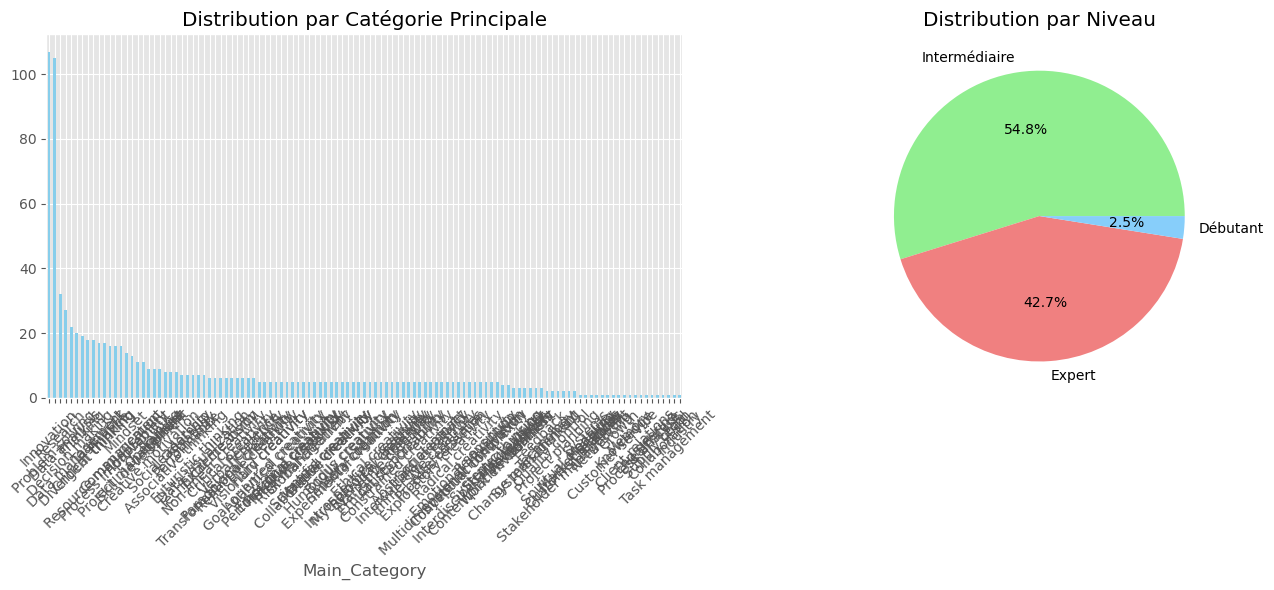

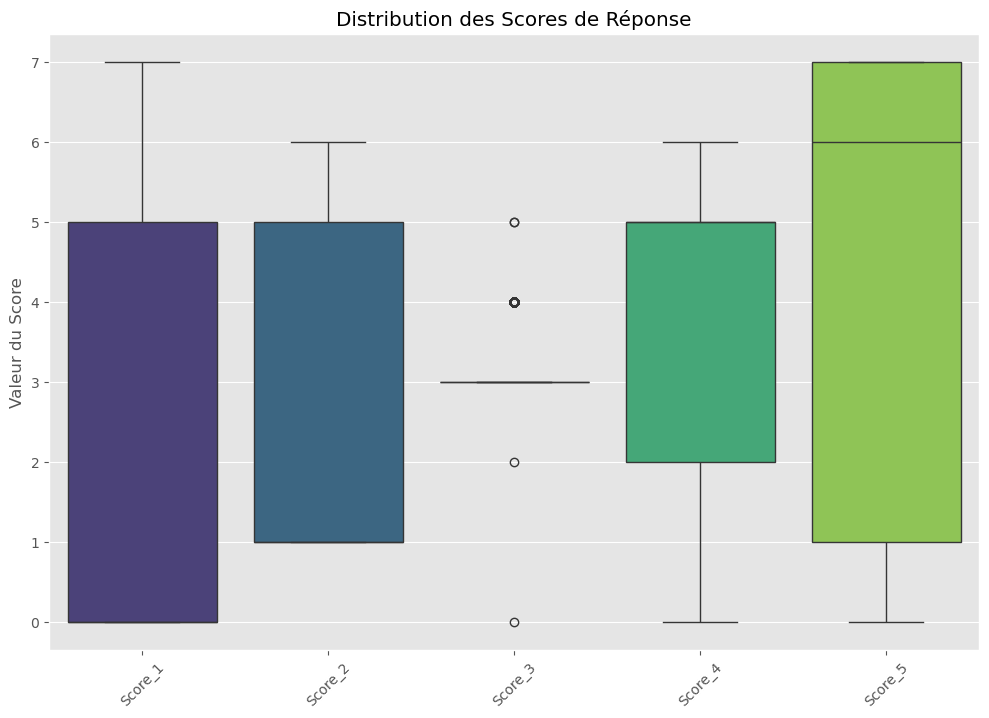

Création des embeddings...


Batches:   0%|          | 0/29 [00:00<?, ?it/s]

Chargement du modèle de génération: google/flan-t5-base...


tokenizer_config.json: 0.00B [00:00, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


Modèles chargés sur cpu!


The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


10 questions générées avec succès!

Aperçu des questions générées:
     ID                                                           Question_EN  \
0  G917                 Which of the following is an example of multitasking?   
1  G918      Which of the following is not a characteristic of a human being?   
2  G919      Which of the following is not a characteristic of a human being?   
3  G920  Which of the following is not a characteristic of field exploration?   
4  G921      Which of the following is not a characteristic of a human being?   

   Creativity  
0    0.787645  
1    0.702715  
2    0.920780  
3    0.907326  
4    0.948354  


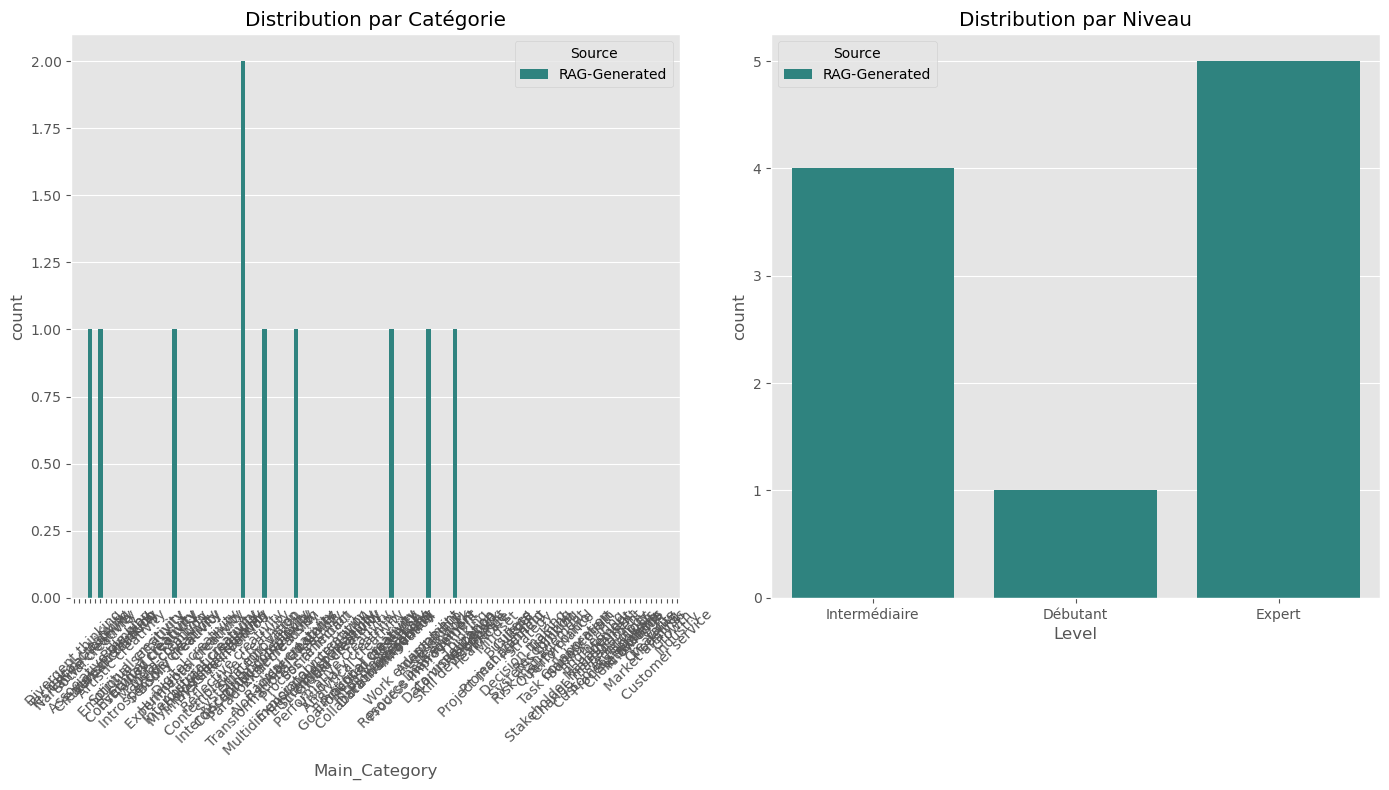

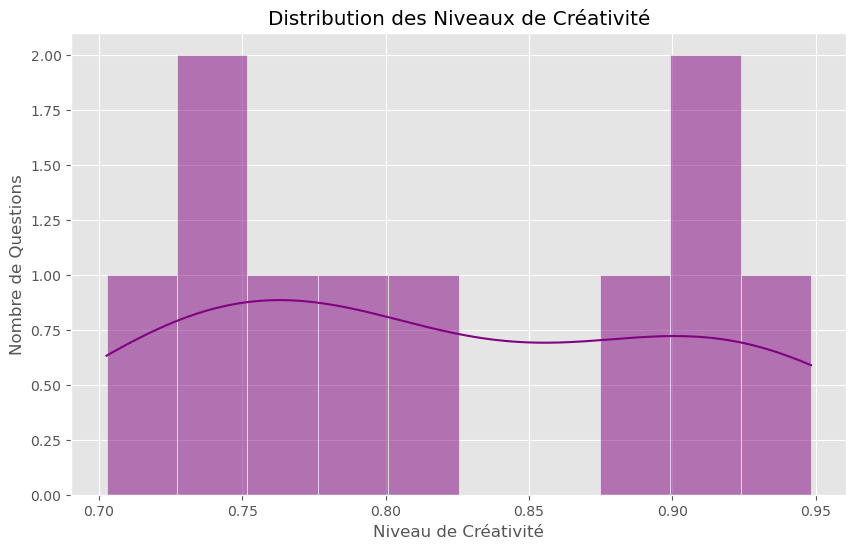


✅ Fichier sauvegardé avec succès: data_final_combine_with_generated.xlsx
Total questions: 926 (916 originales + 10 générées)

Fichier disponible à l'emplacement: C:\Users\user\Desktop\Stage_Data\data_final_combine_with_generated.xlsx


SyntaxError: name 'combined_df' is used prior to global declaration (893822484.py, line 452)

In [7]:
# %% [markdown]
# ## Générateur de Quiz Créatif avec RAG - Version Excel
# 
# Ce notebook génère automatiquement des questions de quiz créatives basées sur votre fichier Excel

# %% [code]
# Installation des dépendances
!pip install -q pandas numpy torch transformers sentence-transformers faiss-cpu scikit-learn openpyxl
!pip install -q --upgrade accelerate

# %% [code]
import pandas as pd
import numpy as np
import torch
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
from sentence_transformers import SentenceTransformer
import faiss
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from tqdm.auto import tqdm
import os
import warnings

# Configuration
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', 100)
plt.style.use('ggplot')

# Définir le chemin du fichier Excel
EXCEL_PATH = "data_final_combine.xlsx"

# %% [markdown]
# ## 1. Chargement des données depuis Excel

# %% [code]
# Charger les données
try:
    df = pd.read_excel(EXCEL_PATH)
    print(f"Fichier Excel chargé avec succès: {EXCEL_PATH}")
    print(f"Nombre de questions: {len(df)}")
    
    # Afficher les colonnes disponibles
    print("\nColonnes détectées:")
    print(df.columns.tolist())
    
    # Aperçu des données
    print("\nAperçu des données:")
    print(df.head())
    
except Exception as e:
    print(f"Erreur lors du chargement du fichier Excel: {e}")
    raise

# %% [markdown]
# ## 2. Vérification et préparation des données

# %% [code]
# Vérifier les colonnes nécessaires
REQUIRED_COLUMNS = ['Question_EN', 'Main_Category', 'Subcategory', 'Level', 
                    'Score_1', 'Score_2', 'Score_3', 'Score_4', 'Score_5']

missing_cols = [col for col in REQUIRED_COLUMNS if col not in df.columns]
if missing_cols:
    print(f"\nATTENTION: Colonnes manquantes: {missing_cols}")
    print("Veuillez vérifier votre fichier Excel.")
else:
    print("\nToutes les colonnes nécessaires sont présentes.")

# Créer une colonne combinée pour l'embedding
df['combined_text'] = df.apply(
    lambda row: f"{row['Question_EN']} [CATEGORY: {row['Main_Category']}] [SUBCAT: {row['Subcategory']}] [LEVEL: {row['Level']}]",
    axis=1
)

# Nettoyer les catégories
for col in ['Main_Category', 'Subcategory', 'Level']:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip().str.capitalize()

# %% [markdown]
# ## 3. Analyse des données existantes

# %% [code]
# Analyse des catégories
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
df['Main_Category'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution par Catégorie Principale')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
if 'Level' in df.columns:
    df['Level'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral', 'lightskyblue'])
    plt.title('Distribution par Niveau')
    plt.ylabel('')
else:
    plt.text(0.5, 0.5, "Colonne 'Level' non trouvée", ha='center')

plt.tight_layout()
plt.show()

# Analyse des scores
score_cols = ['Score_1', 'Score_2', 'Score_3', 'Score_4', 'Score_5']
existing_score_cols = [col for col in score_cols if col in df.columns]

if existing_score_cols:
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=df[existing_score_cols], palette="viridis")
    plt.title('Distribution des Scores de Réponse')
    plt.ylabel('Valeur du Score')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("\nAucune colonne de score trouvée pour l'analyse")

# %% [markdown]
# ## 4. Initialisation des modèles RAG

# %% [code]
# Initialiser le modèle d'embedding
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')

# Générer les embeddings
print("Création des embeddings...")
embeddings = embedding_model.encode(df['combined_text'].tolist(), show_progress_bar=True)

# Normaliser les embeddings
embeddings = embeddings / np.linalg.norm(embeddings, axis=1, keepdims=True)

# Construire l'index FAISS
dimension = embeddings.shape[1]
index = faiss.IndexFlatIP(dimension)
index.add(embeddings.astype('float32'))

# Initialiser le modèle de génération avec gestion d'erreur
try:
    model_name = "google/flan-t5-base"  # Version plus légère pour éviter les problèmes
    print(f"Chargement du modèle de génération: {model_name}...")
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSeq2SeqLM.from_pretrained(model_name)
    
    # Utiliser GPU si disponible
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    print(f"Modèles chargés sur {device}!")
except Exception as e:
    print(f"Erreur lors du chargement du modèle: {e}")
    # Solution de repli
    from transformers import pipeline
    print("Utilisation d'un pipeline de génération de texte comme solution alternative...")
    generator = pipeline('text-generation', model='gpt2', device=0 if torch.cuda.is_available() else -1)
    tokenizer = None
    model = None

# %% [markdown]
# ## 5. Fonctions de génération de questions

# %% [code]
def generate_creative_question(category, subcategory, level, creativity=0.8):
    """Génère une question créative basée sur les paramètres"""
    # Créer une requête
    query_text = f"Generate creative question about {subcategory} in {category} for {level} level"
    query_embedding = embedding_model.encode([query_text], normalize_embeddings=True)
    
    # Recherche des questions similaires
    k = min(3, len(df))
    D, I = index.search(query_embedding.astype('float32'), k)
    similar_questions = "\n".join([f"- {df.iloc[i]['Question_EN']}" for i in I[0]])
    
    # Construction du prompt
    prompt = f"""
    Generate a creative quiz question based on these parameters:
    
    CATEGORY: {category}
    SUBCATEGORY: {subcategory}
    LEVEL: {level}
    CREATIVITY FACTOR: {creativity}
    
    Example questions from our dataset:
    {similar_questions}
    
    Instructions:
    - Use metaphorical language
    - Incorporate a unique perspective
    - Include a hypothetical scenario
    - Ensure the question is appropriate for {level} level
    - Output format: A single engaging question
    
    Creative question:
    """
    
    # Génération de la question
    if tokenizer and model:
        inputs = tokenizer(prompt, return_tensors="pt", max_length=512, truncation=True).to(device)
        outputs = model.generate(
            **inputs,
            max_length=128,
            num_beams=5,
            temperature=0.7 + creativity*0.3,
            top_p=0.9,
            repetition_penalty=1.2,
            no_repeat_ngram_size=3,
            early_stopping=True
        )
        generated_question = tokenizer.decode(outputs[0], skip_special_tokens=True)
    else:
        # Solution de repli avec pipeline
        result = generator(prompt, max_length=150, num_return_sequences=1, 
                          temperature=0.7 + creativity*0.3, 
                          top_p=0.9,
                          no_repeat_ngram_size=3)
        generated_question = result[0]['generated_text'].split("Creative question:")[-1].strip()
    
    # Post-traitement
    generated_question = re.sub(r'^\s*[0-9]+[\.\)]\s*', '', generated_question)
    generated_question = generated_question.strip()
    
    if generated_question and not generated_question[0].isupper():
        generated_question = generated_question[0].upper() + generated_question[1:]
        
    if generated_question and not generated_question.endswith('?'):
        generated_question += '?'
    
    return generated_question, I[0]

def calculate_dynamic_scores(similar_indices, creativity):
    """Calcule les scores basés sur les questions similaires et le niveau de créativité"""
    try:
        # Récupérer les scores des questions similaires
        similar_scores = df.iloc[similar_indices][['Score_1', 'Score_2', 'Score_3', 'Score_4', 'Score_5']]
        
        # Calculer la moyenne
        avg_scores = similar_scores.mean().values
        
        # Appliquer un boost de créativité
        creativity_boost = np.array([0, 0.2, 0.5, 0.8, 1.0]) * creativity
        
        # Combinaison des scores
        final_scores = avg_scores + creativity_boost
        
        # Normaliser pour garder des valeurs cohérentes
        final_scores = np.round(final_scores / final_scores.sum() * 20, 0).astype(int)
        
        # Trier par ordre décroissant
        final_scores.sort()
        final_scores = final_scores[::-1]
        
        return final_scores.tolist()
    except Exception as e:
        print(f"Erreur dans le calcul des scores: {e}")
        # Retourner des scores par défaut en cas d'erreur
        return [5, 4, 3, 2, 1]

# %% [markdown]
# ## 6. Génération de nouvelles questions

# %% [code]
# Paramètres de génération
NUM_NEW_QUESTIONS = 10  # Nombre de nouvelles questions à générer

# Préparer le DataFrame pour les nouvelles questions
new_questions = []

# Créer un ensemble des combinaisons uniques de catégories/sous-catégories
if 'Main_Category' in df.columns and 'Subcategory' in df.columns:
    unique_combinations = df[['Main_Category', 'Subcategory']].drop_duplicates().values
else:
    print("Colonnes Main_Category ou Subcategory manquantes - utilisation de valeurs par défaut")
    unique_combinations = [['Divergent Thinking', 'Originality']]

# Générer les nouvelles questions
for i in range(NUM_NEW_QUESTIONS):
    try:
        # Sélectionner aléatoirement une combinaison catégorie/sous-catégorie
        category, subcategory = unique_combinations[np.random.randint(0, len(unique_combinations))]
        
        # Sélectionner aléatoirement un niveau
        level = np.random.choice(df['Level'].unique()) if 'Level' in df.columns else 'Intermediate'
        
        # Générer un facteur de créativité
        creativity = np.random.uniform(0.7, 0.95)
        
        # Générer la question
        question, similar_indices = generate_creative_question(category, subcategory, level, creativity)
        
        # Calculer les nouveaux scores
        scores = calculate_dynamic_scores(similar_indices, creativity)
        
        # Ajouter la nouvelle question
        new_questions.append({
            'ID': f"G{len(df) + i + 1}",
            'Question_EN': question,
            'Main_Category': category,
            'Subcategory': subcategory,
            'Level': level,
            'Score_1': scores[0],
            'Score_2': scores[1],
            'Score_3': scores[2],
            'Score_4': scores[3],
            'Score_5': scores[4],
            'Creativity': creativity,
            'Source': 'RAG-Generated'
        })
    except Exception as e:
        print(f"\nErreur lors de la génération de la question {i+1}: {str(e)}")
        continue

# Créer un DataFrame avec les nouvelles questions
if new_questions:
    new_df = pd.DataFrame(new_questions)
    print(f"\n{len(new_df)} questions générées avec succès!")
    
    # Afficher un aperçu des questions générées
    print("\nAperçu des questions générées:")
    print(new_df[['ID', 'Question_EN', 'Creativity']].head())
else:
    print("\nAucune question générée. Vérifiez les erreurs ci-dessus.")
    new_df = pd.DataFrame()

# %% [markdown]
# ## 7. Analyse et sauvegarde des résultats

# %% [code]
if not new_df.empty:
    # Combiner les données originales et les nouvelles questions
    combined_df = pd.concat([df, new_df], ignore_index=True)
    
    # Visualiser les nouvelles questions
    plt.figure(figsize=(14, 8))
    
    # Distribution par catégorie
    plt.subplot(1, 2, 1)
    if 'Main_Category' in combined_df.columns and 'Source' in combined_df.columns:
        sns.countplot(data=combined_df, x='Main_Category', hue='Source', palette='viridis')
        plt.title('Distribution par Catégorie')
        plt.xticks(rotation=45)
    else:
        plt.text(0.5, 0.5, "Données manquantes pour la visualisation", ha='center')
    
    # Distribution par niveau
    plt.subplot(1, 2, 2)
    if 'Level' in combined_df.columns and 'Source' in combined_df.columns:
        sns.countplot(data=combined_df, x='Level', hue='Source', palette='viridis')
        plt.title('Distribution par Niveau')
    else:
        plt.text(0.5, 0.5, "Données manquantes pour la visualisation", ha='center')
    
    plt.tight_layout()
    plt.show()
    
    # Analyse de créativité
    if 'Creativity' in new_df.columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(new_df['Creativity'], bins=10, kde=True, color='purple')
        plt.title('Distribution des Niveaux de Créativité')
        plt.xlabel('Niveau de Créativité')
        plt.ylabel('Nombre de Questions')
        plt.show()
    
    # Sauvegarder dans un nouveau fichier Excel
    output_path = EXCEL_PATH.replace('.xlsx', '_with_generated.xlsx')
    combined_df.to_excel(output_path, index=False)
    print(f"\n✅ Fichier sauvegardé avec succès: {output_path}")
    print(f"Total questions: {len(combined_df)} ({len(df)} originales + {len(new_df)} générées)")
    
    # Afficher le chemin du fichier
    print(f"\nFichier disponible à l'emplacement: {os.path.abspath(output_path)}")
else:
    print("\nAucun résultat à sauvegarder.")

# %% [markdown]
# ## 8. Interface de génération manuelle (version simplifiée)

# %% [code]
def simple_question_generator():
    """Interface texte simple pour générer des questions"""
    print("\n" + "="*50)
    print("GÉNÉRATEUR DE QUESTION PERSONNALISÉE".center(50))
    print("="*50)
    
    # Afficher les catégories disponibles
    categories = df['Main_Category'].unique() if 'Main_Category' in df.columns else ['Divergent Thinking']
    print("\nCatégories disponibles:")
    for i, cat in enumerate(categories):
        print(f"{i+1}. {cat}")
    
    cat_idx = int(input("\nSélectionnez une catégorie (numéro): ")) - 1
    category = categories[cat_idx]
    
    # Afficher les sous-catégories disponibles
    if 'Subcategory' in df.columns:
        subcategories = df[df['Main_Category'] == category]['Subcategory'].unique()
    else:
        subcategories = ['Originality']
        
    print(f"\nSous-catégories disponibles pour {category}:")
    for i, sub in enumerate(subcategories):
        print(f"{i+1}. {sub}")
    
    sub_idx = int(input("\nSélectionnez une sous-catégorie (numéro): ")) - 1
    subcategory = subcategories[sub_idx]
    
    # Sélectionner le niveau
    levels = df['Level'].unique() if 'Level' in df.columns else ['Intermediate']
    print("\nNiveaux disponibles:")
    for i, lvl in enumerate(levels):
        print(f"{i+1}. {lvl}")
    lvl_idx = int(input("\nSélectionnez un niveau (numéro): ")) - 1
    level = levels[lvl_idx]
    
    # Niveau de créativité
    creativity = float(input("\nNiveau de créativité (0.1 à 1.0): "))
    
    # Générer la question
    print("\nGénération en cours...")
    question, similar_indices = generate_creative_question(category, subcategory, level, creativity)
    scores = calculate_dynamic_scores(similar_indices, creativity)
    
    print("\n" + "="*60)
    print("QUESTION GÉNÉRÉE".center(60))
    print("="*60)
    print(f"\n{question}\n")
    print(f"Catégorie: {category} > {subcategory}")
    print(f"Niveau: {level}")
    print(f"Créativité: {creativity:.2f}")
    print("\nScores de réponse:")
    for i, score in enumerate(scores, 1):
        print(f"Score {i}: {score}")
    
    # Demander si on veut sauvegarder
    save = input("\nVoulez-vous sauvegarder cette question? (o/n) ").lower()
    if save == 'o':
        new_id = f"MC{len(combined_df) + 1}"  # MC pour Manual Custom
        new_question = {
            'ID': new_id,
            'Question_EN': question,
            'Main_Category': category,
            'Subcategory': subcategory,
            'Level': level,
            'Score_1': scores[0],
            'Score_2': scores[1],
            'Score_3': scores[2],
            'Score_4': scores[3],
            'Score_5': scores[4],
            'Creativity': creativity,
            'Source': 'Custom-Generated'
        }
        
        # Ajouter au DataFrame combiné
        global combined_df
        combined_df = pd.concat([combined_df, pd.DataFrame([new_question])], ignore_index=True)
        
        # Sauvegarder le nouveau fichier
        combined_df.to_excel(output_path, index=False)
        print(f"\n✅ Question sauvegardée avec l'ID {new_id}")

# Lancer l'interface
print("\nInterface de génération manuelle:")
simple_question_generator()